In [16]:
#Import LIBRARIES
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply( lambda x: ast.literal_eval(x) if pd.notna(x) else x)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

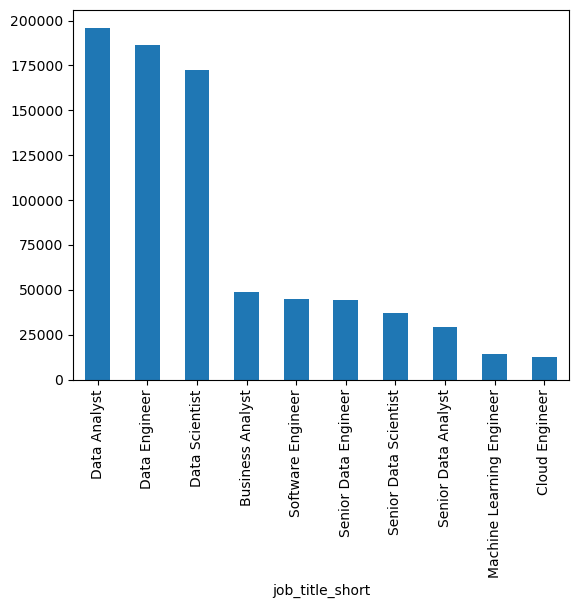

In [3]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

df['job_schedule_type'].value_counts().head(3)

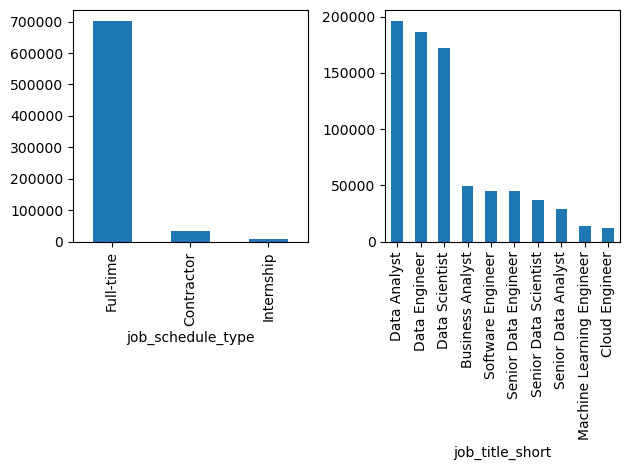

In [4]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

fig.tight_layout()

In [5]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


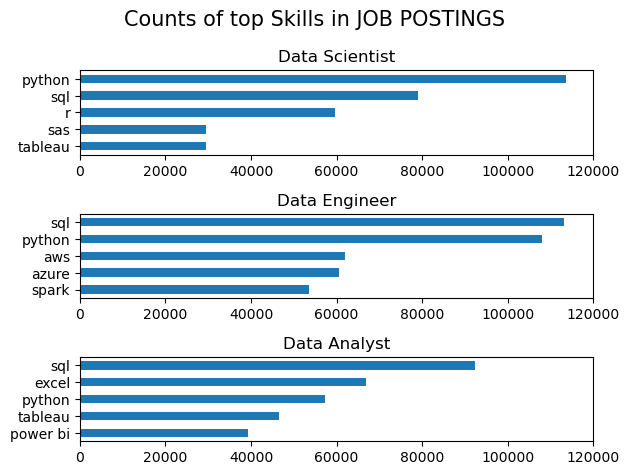

In [6]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

fig, ax =plt.subplots(3, 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count',ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)


fig.suptitle('Counts of top Skills in JOB POSTINGS', fontsize=15)
fig.tight_layout()

In [7]:
df_top_locations = df.groupby('job_location')['job_title_short'].size().reset_index(name='job_postings')
df_top_locations = df_top_locations.sort_values(by='job_postings', ascending=False).head(3)
df_top_locations

,job_location,job_postings
607,Anywhere,69552
14051,Singapore,23415
11529,"Paris, France",12311


In [8]:
df_top_titles = df.groupby('job_title_short')['job_title_short'].size().reset_index(name='Number_posting')
df_top_titles=df_top_titles.sort_values(by='Number_posting', ascending=False).head(3)

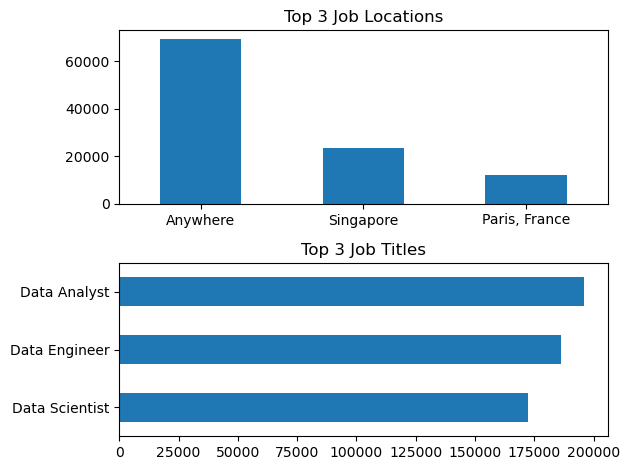

In [9]:
fig, ax = plt.subplots(2,1)

df_top_locations.plot(kind='bar',x='job_location',y='job_postings', ax=ax[0])
df_top_titles.plot(kind='barh',x='job_title_short', y= 'Number_posting' ,ax=ax[1])

ax[0].set_title('Top 3 Job Locations')
ax[0].tick_params(axis='x', rotation=0)
ax[0].legend().set_visible(False)
ax[0].set_xlabel('')


ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()
ax[1].legend().set_visible(False)
ax[1].set_ylabel('')

fig.tight_layout()
fig.legend().set_visible(False)
plt.show()


In [10]:
df.groupby('job_schedule_type')['job_title_short'].size().reset_index()

,job_schedule_type,job_title_short
0,Contractor,34793
1,Contractor and Full-time,2
2,Contractor and Internship,41
3,Contractor and Part-time,3
4,Contractor and Per diem,4
5,Contractor and Temp work,2283
6,"Contractor, Temp work, and Internship",3
7,Full-time,701727
8,Full-time and Contractor,2292
9,Full-time and Internship,2340


In [26]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

pivot = df.pivot_table(index='job_schedule_type', columns='job_title_short', aggfunc='size').fillna(0)




In [81]:
# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()

array(['Internship'], dtype=object)

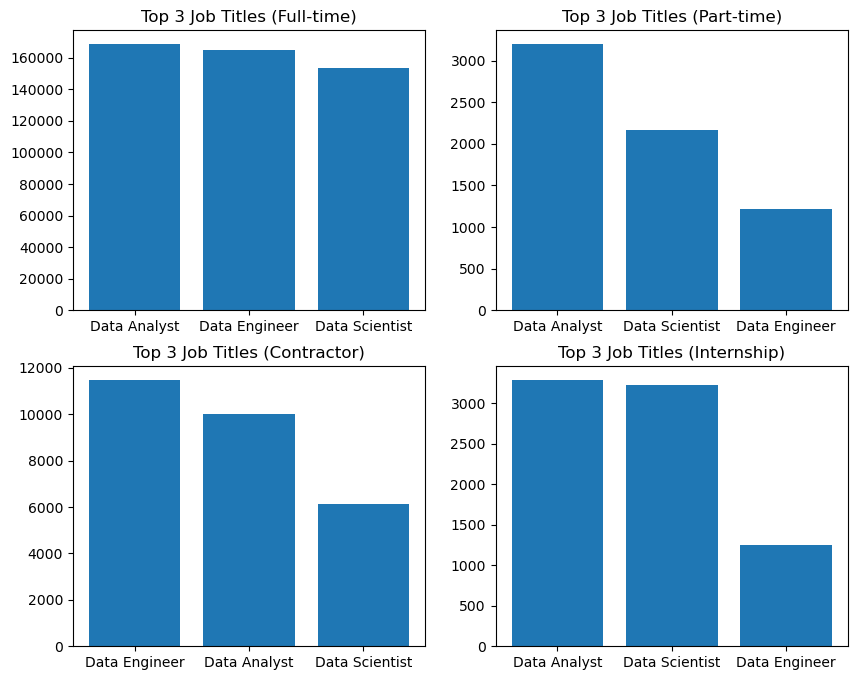

In [86]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')



df_schedule['job_schedule_type'].unique()


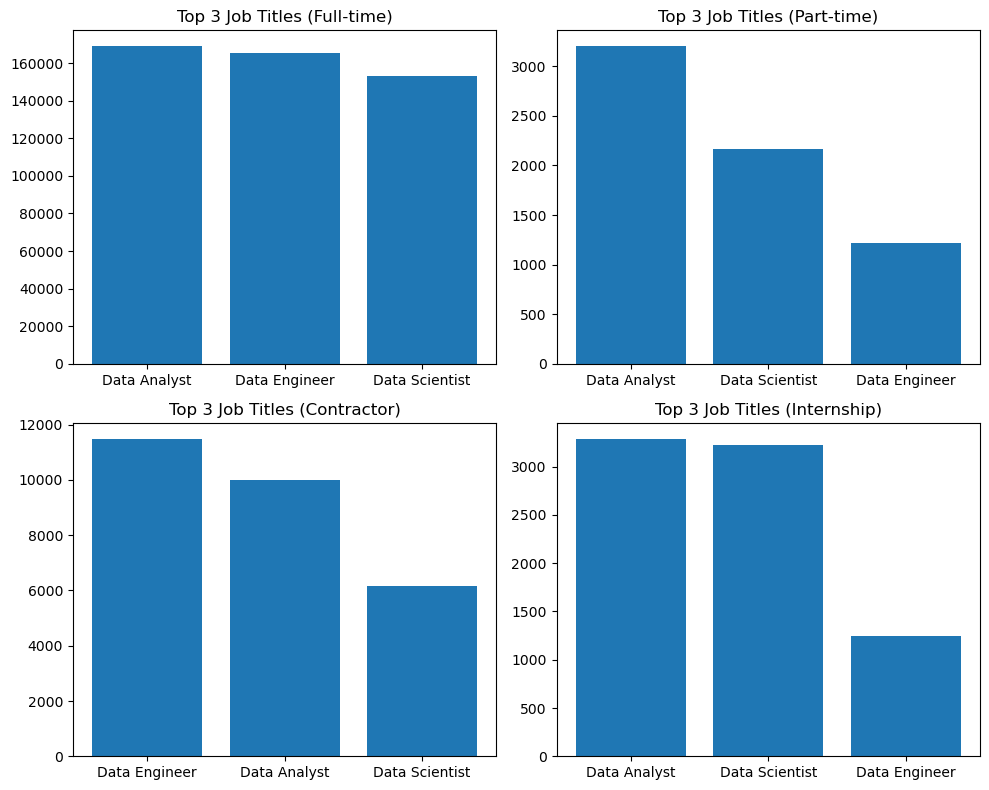

In [87]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()

In [20]:
df_new = df.explode('job_skills').copy()

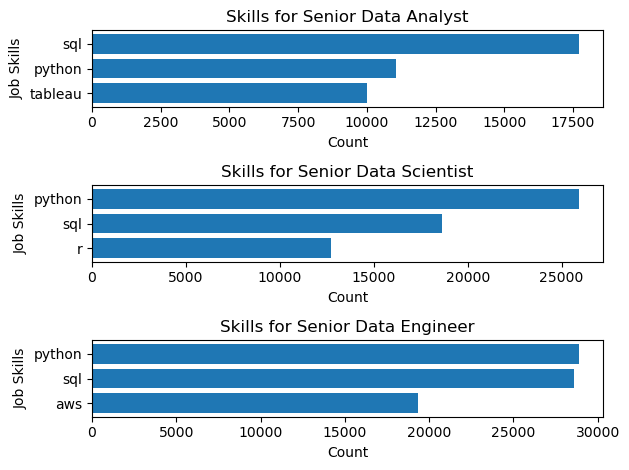

In [38]:
fig, ax = plt.subplots(3, 1)

job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

for i, job_role in enumerate(job_roles):
    df_role = df_new[df_new['job_title_short'] == job_role]
    skills = df_role['job_skills'].value_counts().head(3)
    
    ax[i].barh(skills.index, skills.values)
    ax[i].invert_yaxis()
    ax[i].set_title(f'Skills for {job_role}')
    
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    
    

fig.tight_layout()
plt.show()